In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\sukha\Downloads\DATA_SCIENCE\DATASET\Cleaned_DATA.csv")

In [4]:
print("Initial Data Shape:", df.shape)
print(df.head())

Initial Data Shape: (53625, 10)
  Country           State   District  Year       Month Reservoir Basin Name  \
0   India  Andhra Pradesh  Anantapur  2021  2021-05-01               PENNAR   
1   India  Andhra Pradesh  Anantapur  2021  2021-05-01               PENNAR   
2   India  Andhra Pradesh  Anantapur  2021  2021-05-01               PENNAR   
3   India  Andhra Pradesh  Anantapur  2021  2021-05-01               PENNAR   
4   India  Andhra Pradesh  Anantapur  2021  2021-05-01               PENNAR   

                       Reservoir Name  Full_Reservoir_Capacity_BCM  \
0                 GODDAMVARIPALLI SR3                        0.010   
1      CHITRAVATI BALANCING RESERVOIR                        0.280   
2                MID PENNAR RESERVOIR                        0.150   
3  PENNA AHOBILAM BALANCING RESERVOIR                        0.310   
4  PENNAR KUMUDWATHI PROJECT (ANICUT)                        1.785   

   Reservoir_Water_Level_M  Reservoir_Water_Storage_BCM  
0             

In [5]:
# --- 1. Drop Columns ---
# 'Country' is constant, 'Month' has too many missing values to be reliable.
df = df.drop(columns=['Country', 'Month'])

In [6]:
# --- 2. Define Features (X) and Target (y) ---
target_column = 'Reservoir_Water_Storage_BCM'
y = df[target_column]
X = df.drop(columns=[target_column])

In [7]:

# --- 3. Handle Categorical Features (One-Hot Encoding) ---
# Identify categorical columns for encoding
categorical_cols = ['State', 'District', 'Reservoir Basin Name', 'Reservoir Name']

In [8]:
# Apply One-Hot Encoding. 'drop_first=True' helps prevent multicollinearity.
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [9]:

# Display the shape of the processed data
print("\nShape of features (X) after encoding:", X_encoded.shape)
print("Example of encoded feature names:", X_encoded.columns[:10].tolist())


Shape of features (X) after encoding: (53625, 584)
Example of encoded feature names: ['Year', 'Full_Reservoir_Capacity_BCM', 'Reservoir_Water_Level_M', 'State_Chhattisgarh', 'State_Gujarat', 'State_Himachal Pradesh', 'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh']


In [10]:
# Final check for missing values (assuming EDA covered numerical imputation/cleaning)
print("\nMissing values check:", X_encoded.isnull().sum().sum())


Missing values check: 0


In [11]:
# Assign the final feature set back to X
X = X_encoded

In [12]:
# --- 1. Split Data ---
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (42900, 584), X_test shape: (10725, 584)
y_train shape: (42900,), y_test shape: (10725,)


In [13]:
# --- 2. Initialize and Train Model ---
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

print("\nLinear Regression Model training complete.")


Linear Regression Model training complete.


In [14]:
# Optional: Print the model's coefficients (which features contributed most)
print(f"Intercept (c): {linear_model.intercept_:.4f}")
# Top 5 coefficients by absolute value
coefficients = pd.Series(linear_model.coef_, index=X_train.columns)
top_5_abs_coeffs = coefficients.abs().sort_values(ascending=False).head(5).index.tolist()
print(f"Top 5 most influential features (by absolute coefficient): {top_5_abs_coeffs}")

Intercept (c): -19.0423
Top 5 most influential features (by absolute coefficient): ['Reservoir Name_Ukai', 'Reservoir Name_Ukai Reservoir', 'District_Tapi', 'Reservoir Name_Doswada', 'Reservoir Name_Kadana']


In [15]:
# --- 1. Make Predictions ---
# Predict the reservoir water storage on the test set
y_pred = linear_model.predict(X_test)

In [16]:
# --- 2. Calculate Evaluation Metrics ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:

# --- 3. Display Results ---
print("--- Linear Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

--- Linear Regression Model Evaluation ---


Mean Absolute Error (MAE): 0.0978
Mean Squared Error (MSE): 0.1038
Root Mean Squared Error (RMSE): 0.3222
R-squared (R^2): 0.7442


In [18]:

# Optional: Visualize a comparison of actual vs. predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nFirst 10 Actual vs. Predicted values:")
print(results.head(10))


First 10 Actual vs. Predicted values:
       Actual  Predicted
17247    0.00   0.007656
5637     0.06   0.062274
42140    0.02   0.006800
25918    0.02   0.026121
39388    0.02  -0.004727
40700    0.27   0.180391
29399    0.02   0.025789
13609    0.01   0.017430
15145    0.07   0.068294
46411    0.02   0.005636


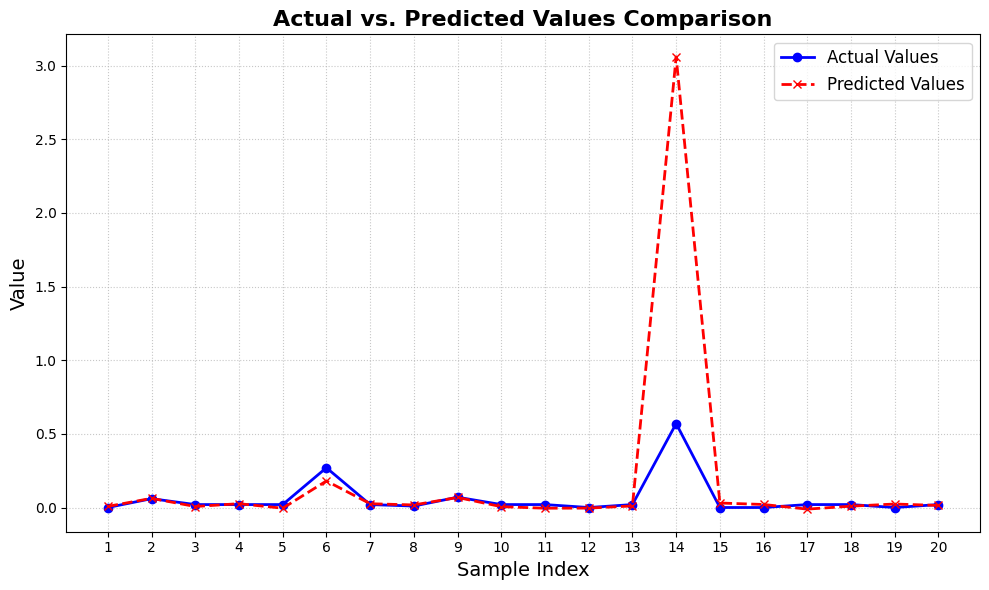

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = {
    'Actual': y_test [:20],
    'Predicted': y_pred [:20]
}
results = pd.DataFrame(data)

# Set the index as the 'Sample Index'
results.index = np.arange(1, len(results) + 1)
# --- END: Replace this section ---


# Create the plot
plt.figure(figsize=(10, 6))

# Plot the 'Actual' values
plt.plot(
    results.index, 
    results['Actual'], 
    label='Actual Values', 
    marker='o', 
    linestyle='-', 
    color='blue',
    linewidth=2
)

# Plot the 'Predicted' values
plt.plot(
    results.index, 
    results['Predicted'], 
    label='Predicted Values', 
    marker='x', 
    linestyle='--', 
    color='red',
    linewidth=2
)

# Add titles and labels for academic presentation
plt.title('Actual vs. Predicted Values Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Add a legend
plt.legend(loc='best', fontsize=12)

# Add grid lines for better readability of the comparison
plt.grid(True, linestyle=':', alpha=0.7)

# Ensure x-axis ticks align with the sample index
plt.xticks(results.index)

# Display the plot
plt.tight_layout()
plt.savefig('actual_vs_predicted_plot.png')